# Stack Exchange Popular Data Science Questions

In this project, we set to pull the most popular data science questions from Stack Exchange by utilizing the Stack Exchange Data Explorer (SEDE).

## Initial SQL Exploration

We begin by exploring the tables within the SEDE. The `Posts` table seems to be the most relevant to our goal of finding the most popular questions. Using the following query, we can see the relevant columns within the table as well as sample rows.

```sql
SELECT TOP 10 *
FROM Posts;
```

![Screenshot 2024-12-17 142147.jpg](<attachment:Screenshot 2024-12-17 142147.jpg>)
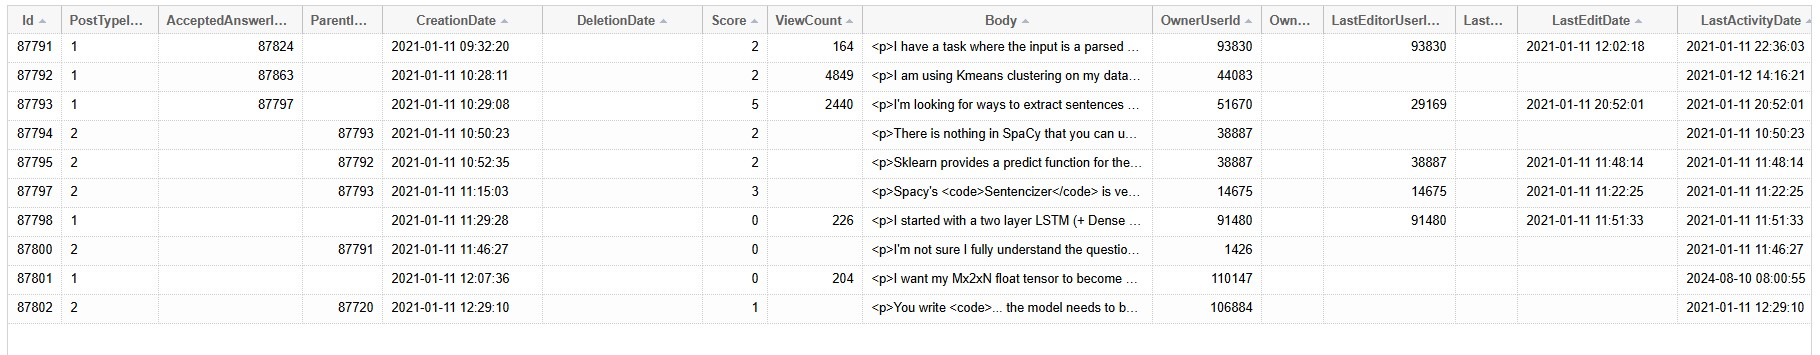

Running the following gives us an explanation on Post Types:

```sql
SELECT *
FROM PostTypes;
```

![Screenshot 2024-12-17 142503.jpg](<attachment:Screenshot 2024-12-17 142503.jpg>)
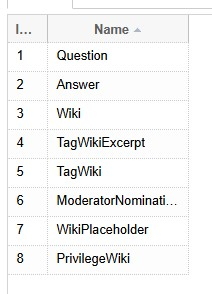

Seeing this table, we can see that we want to narrow down our posts to the `PostTypeId` of 1 to only view questions.

## Get Relevant Data From `Questions` Post Type

The columns that we are targetting are:
- Id
- PostTypeId
- CreationDate
- Score
- ViewCount
- Tags
- AnswerCount
- FavoriteCount

---

### Questions from 2024

We can filter the Posts table with the necessary columns by `Questions` type with the following query, focusing on only posts that are within the current year (2024):

```sql
SELECT Id, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM Posts
WHERE PostTypeId = 1 AND CreationDate >= '2024-01-01 00:00:00'
ORDER BY CreationDate DESC;
```

![Screenshot 2024-12-17 142904.jpg](<attachment:Screenshot 2024-12-17 142904.jpg>)

---

### Dynamic: Questions from last 12 months

We can even convert this into a dynamic query that will pull a years worth of data regardless of the current date.

```sql
SELECT Id, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM Posts
WHERE PostTypeId = 1 AND CreationDate >= DATEADD(MONTH, -12, GETDATE())
ORDER BY CreationDate DESC;
```

![Screenshot 2024-12-17 143717.jpg](<attachment:Screenshot 2024-12-17 143717.jpg>)

Using this resulting table, we will download it as a `.csv` and analyze our results further.
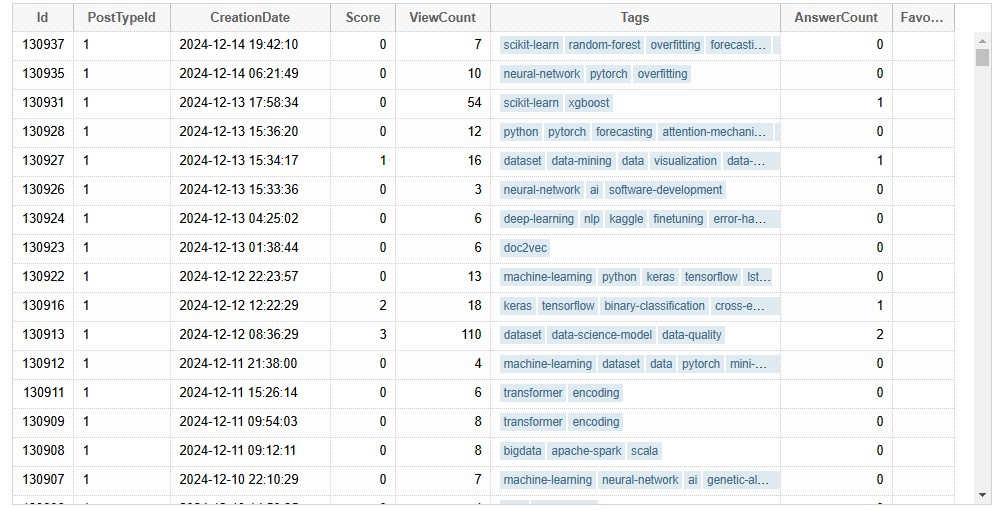
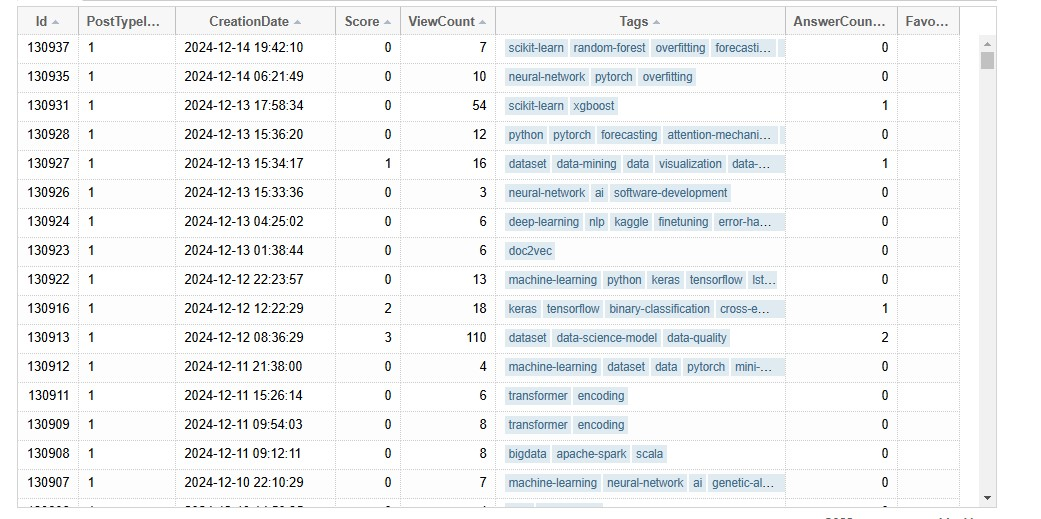

## 